# Health Insurance Annual premium charges prediction

1. Domain Exploration
   - understanding the business process, how operations function on shop floor
   - interacting with stakeholders on shop floor, understanding business assumptions and customer behaviour
   - Understanding data sources, lifecycle of data


2. Data Collection and Data Exploration
    - collect relevant data from multiple sources, build a dataset
    - perform generic analysis on data to identify common issues with data


3. Data Cleaning
    - handle missing values
    - handle duplicated entries
    - handle outliers, unwanted columns


4. Feature Engineering
    - Feature Extraction
    - Feature Selection / Exploratory Data ANalytics / Root Cause Analytics

        - Data Visualization

            - Univariate Analysis
            - Bivariate Analysis
            - Multivariate Analysis

        - Statistical Research

            - Correlation Analysis
            - ANOVA
            - Chi Square test


5. Preprocessing the features
    - Encoding the categoric attributes
    - Normalization of numeric attributes
    - separate whole dataset into train and test set


6. Apply Machine Learning
    - pick a learning algorithm
    - train the model


7. Performance Analysis
    - pick suitable metrics to assess performance of ML model


8. Optimization and Tuning
    - optimize the model, tune hyperparameters


9. Deployment
    - Export the trained model as object file
    - deploy the inferense pipeline as REST API service


10. Monitor performance of model in production
    - periodic data drift analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
## 2. data collection and exploration
df = pd.read_csv(r"D:\AI\data\datasets-1\insurance.csv")
df.shape

(1338, 7)

In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head()

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

        - target: charges - numeric
        - categoric: Gender, smoker, region
        - numeric: age, bmi, children

## 3. Data Cleaning

In [5]:
# check for duplicates
df.duplicated().sum()

1

In [6]:
# show the duplicate row
df[df.duplicated()]

,age,Gender,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# show the duplicate row
df[df.duplicated(keep=False)]

,age,Gender,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# check for missing values
df.isnull().sum()

age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# check outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_22624/153980068.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

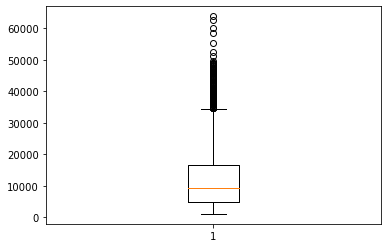

In [11]:
plt.boxplot(df.charges)
plt.show()

In [15]:
# clip the charge by 40k
df.charges[df.charges>40000] = 40000

C:\Users\admin\AppData\Local\Temp/ipykernel_22624/2562792498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.charges[df.charges>40000] = 40000


In [16]:
df.charges.skew()

1.276232199746612

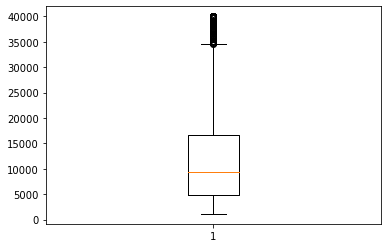

In [17]:
plt.boxplot(df.charges)
plt.show()

## 4. Feature Engineering

In [18]:
df.columns

Index(['age', 'Gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
nums = ['age', 'bmi', 'children']
cats = ['Gender', 'smoker', 'region']

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


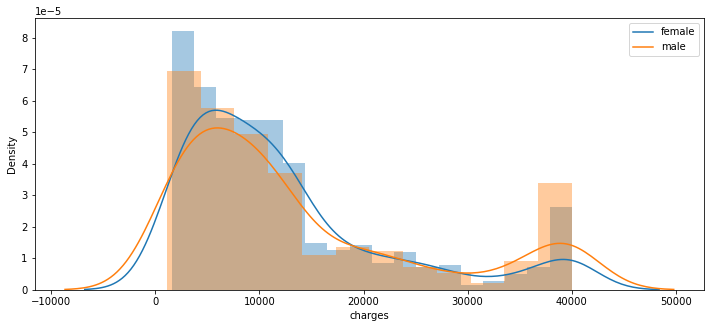

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


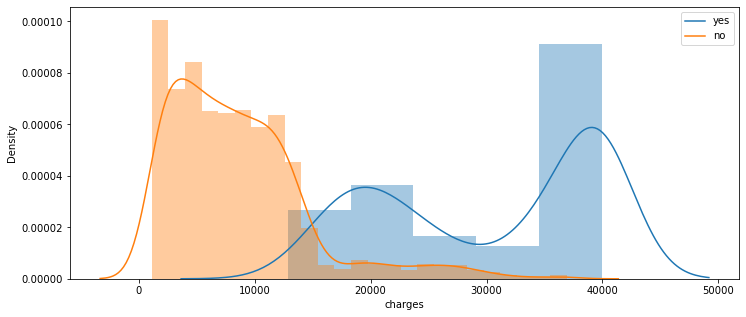

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

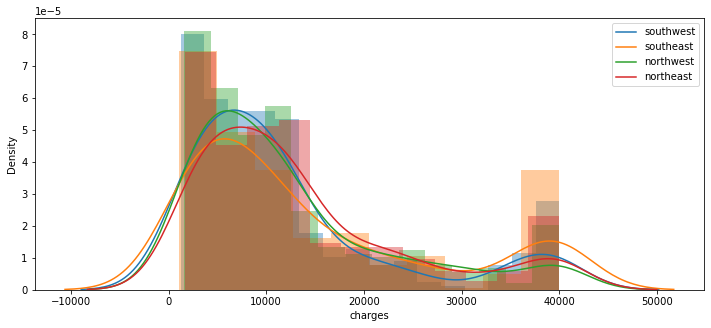

In [21]:
# Bivariate Analysis
# categoric v/s numeric

for col in cats:
    plt.figure(figsize=(12,5))
    categories = df[col].unique()
    for categ in categories:
        sns.distplot(df.charges[df[col]==categ])
    plt.legend(categories)
    plt.show()

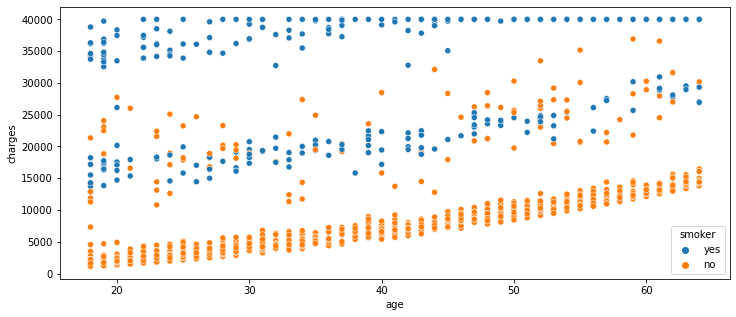

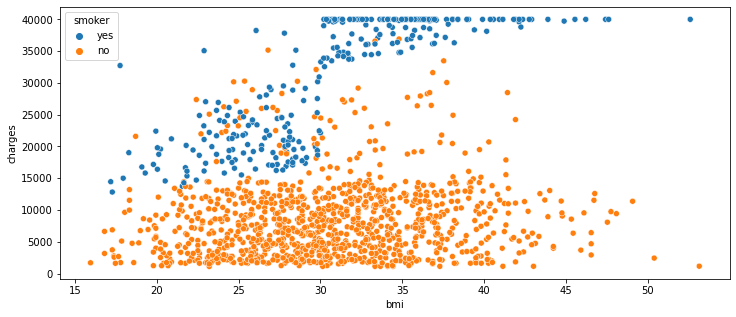

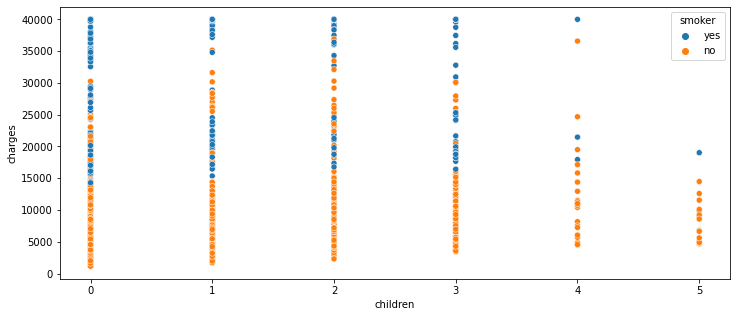

In [20]:
## Bivariate Analysis
for col in nums:
    plt.figure(figsize=(12,5))
    sns.scatterplot(x=col,y='charges',hue='smoker',data=df)
    plt.show()

In [22]:
df.columns

Index(['age', 'Gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
x = df[['age','Gender','bmi','smoker','children']]
y = df.charges

## 5. Preprocessing of features

In [24]:
x.head()

,age,Gender,bmi,smoker,children
0,19,female,27.900,yes,0
1,18,male,33.770,no,1
2,28,male,33.000,no,3
3,33,male,22.705,no,0
4,32,male,28.880,no,0


In [25]:
from sklearn.preprocessing import LabelEncoder
gen = LabelEncoder()
smk = LabelEncoder()
x.Gender = gen.fit_transform(x.Gender)
x.smoker = smk.fit_transform(x.smoker)
x.head()

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,Gender,bmi,smoker,children
0,19,0,27.900,1,0
1,18,1,33.770,0,1
2,28,1,33.000,0,3
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [26]:
x.shape

(1337, 5)

In [27]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(1337, 5) (1069, 5) (268, 5)
(1337,) (1069,) (268,)


## 6. Apply Machine Learning - linear regression

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# train the model using train data
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
# new cust, age = 25, gender = male, children = 2, bmi = 32, smoker = 1
newcust = [[25,1,32,1,2]]
model.predict(newcust)

array([28054.91000718])

## 7. Performance Analysis

In [30]:
# feed the xtest to the model to get predictions
ypred = model.predict(xtest)

In [31]:
# calculate r2 score
from sklearn import metrics
metrics.r2_score(ytest,ypred)

0.7614162445382727

## 9. Deployment: export the trained model 
    export the trained ML model as a pickle file (pkl)
    
    

In [32]:
import joblib

In [33]:
joblib.dump(model,"insruance.pkl")

['insruance.pkl']